In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re
# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stopwords = stopwords.words('english')



<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\changc42\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\changc42\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\changc42\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package

In [2]:
colNames = ['text', 'sentiment']
imdb = pd.read_csv ('../data/imdb_labelled.txt', delimiter='\t', names=colNames, header=None)
yelp = pd.read_csv ('../data/yelp_labelled.txt', delimiter='\t', names=colNames, header=None)
amazon = pd.read_csv ('../data/amazon_cells_labelled.txt', delimiter='\t', names=colNames, header=None)


In [3]:
df = pd.concat([imdb, yelp, amazon])
df.reset_index(drop=True, inplace=True)
df.shape

(3000, 2)

In [4]:
#unmodified visualizations

# df.to_csv("all3_csv_unmodified.txt")
# positive_df = df[df["sentiment"]==1]
# positive_df.to_csv("all3_csv_positive.txt")
# negative_df = df[df["sentiment"]==0]
# negative_df.to_csv("all3_csv_negative.txt")

In [11]:
def lowercase(s):
    return s.lower()

def lem_with_pos_tag(a_string):
    # Initalize our Lemmer
    lemmatizer = WordNetLemmatizer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Get the word and pos_tag for each of the words. 
    tagged_words = nltk.pos_tag(words)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in tagged_words:
        
        # The word is the first element in the tuple
        the_word = word[0]
        
        # The pos_tag is the second element in the tuple
        the_pos_tag = word[1]
        
        # Convert the pos_tag into the format the lemmatizer accepts
        the_pos_tag = convert_pos(the_pos_tag)
        
        # Lemmatize the word with the pos_tag
        lemmed_word = lemmatizer.lemmatize(the_word, the_pos_tag)
        
        # Append stemmed word to our valid_words
        valid_words.append(lemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 

def stem_words(a_string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 
    
def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

def convert_pos(pos):
    if pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def text_pipeline(s):
    s = remove_punctuation(s)
    s = lowercase(s)
#     s = remove_stopwords(s)
    s = lem_with_pos_tag(s)
    s = stem_words(s)
    
    
    return s
    



In [12]:

df["clean_message"] = df["text"].apply(text_pipeline)
df.head()

,text,sentiment,clean_message
0,"A very, very, very slow-moving, aimless movie ...",0,a veri veri veri slowmov aimless movi about a ...
1,Not sure who was more lost - the flat characte...,0,not sure who be more lost the flat charact or ...
2,Attempting artiness with black & white and cle...,0,attempt arti with black white and clever camer...
3,Very little music or anything to speak of.,0,veri littl music or anyth to speak of
4,The best scene in the movie was when Gerardo i...,1,the best scene in the movi be when gerardo be ...


In [7]:

df["clean_message"].to_csv("cleaned_messages.csv")

In [13]:
#tfid vectorizer can apply lowercase/remove p unctuation, etc

from sklearn.feature_extraction.text import TfidfVectorizer

X = df["clean_message"]
y = df["sentiment"]

# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# This makes your vocab matrix
vectorizer.fit(X)
# This transforms your documents into vectors.
X = vectorizer.transform(X)

print(X.shape, type(X))

(3000, 4171) <class 'scipy.sparse.csr.csr_matrix'>


In [9]:
#DEBUG
new_text = 'Electronics are the worst'

# Feature engineer the same way we did with our original data. 
new_text = text_pipeline(new_text)

# Sanity check
print(new_text)

# Turn the new_text into numbers using the vectorizer
# NOTE, must be passed in as a list.
# NOTE, use just transform here, NOT FIT. 
new_text_vectorized = vectorizer.transform([new_text])

# make a new prediction using our model and vectorized text
# model.predict(new_text_vectorized)

electron be the bad


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

    negative       0.83      0.85      0.84       290
    positive       0.86      0.84      0.85       310

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



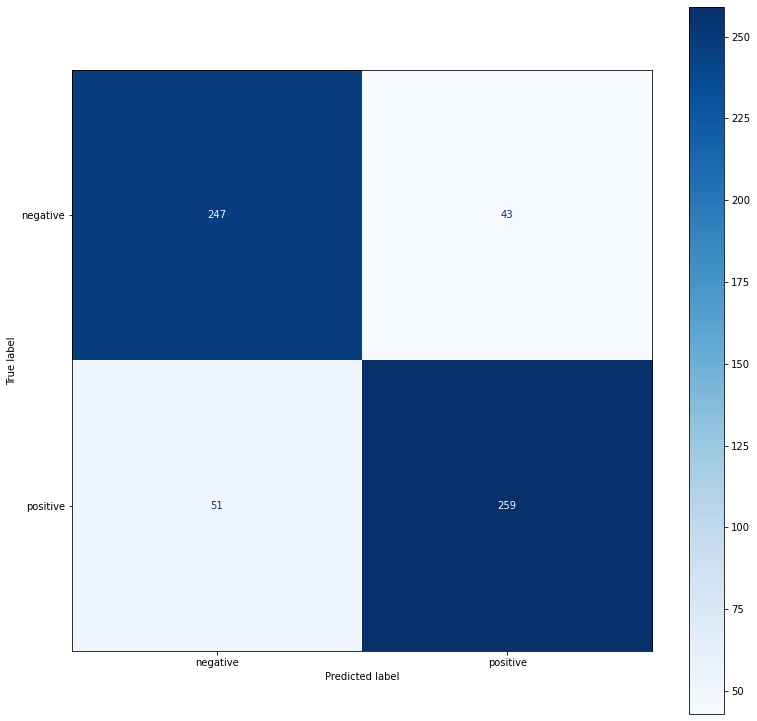

In [15]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

classes = ["negative", "positive"]
print(metrics.classification_report(y_test, y_pred, target_names=classes))

fig, ax = plt.subplots(figsize=(13,13))
plot_confusion_matrix(model, X_test, y_test, display_labels=classes, cmap=plt.cm.Blues, ax=ax)

In [15]:
#compute accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8416666666666667

In [102]:
#see which examples were predicted wrong
y_test_identifiers = y_test.index.array
indices_of_incorrect = []
for i in range(0, len(y_pred)):
    if y_pred[i]!=y_test.array[i]:
#         print("sentence: ",df.loc[y_test_identifiers[i]])
#         print("true: ", y_test.array[i])
#         print("predicted: ", y_pred[i])
#         print("\n")
        indices_of_incorrect.append(y_test_identifiers[i])
df.loc[indices_of_incorrect]
df.loc[1226]


text             This is an unbelievable BARGAIN!
sentiment                                       1
clean_message         This unbelievable BARGAIN !
Name: 1226, dtype: object

In [100]:
df.loc[indices_of_incorrect]["text"].to_csv("incorrectly_predicted_sentences.txt")

In [77]:
y_test

1801    1
1190    1
1817    1
251     0
2505    0
       ..
104     0
2087    0
599     0
1756    0
1323    1
Name: sentiment, Length: 600, dtype: int64